In [1]:
import pandas as pd
import numpy as  np

import datetime

import seaborn as sns
import matplotlib.pyplot as plt

from ipywidgets import interact
from mlxtend.preprocessing import TransactionEncoder

In [2]:
movies_data= pd.read_csv("movies.csv")
movies_data.head()
# movies_data.describe()
# movies_data.shape

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
ratings_data=pd.read_csv("ratings.csv")
ratings_data.head()
# ratings_data.describe()
# ratings_data.shape

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
df = pd.merge(movies_data,ratings_data,on ="movieId",how ="inner")
df

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
96806,161582,Hell or High Water (2016),Crime|Drama,610,4.0,1493847759
96807,161594,Kingsglaive: Final Fantasy XV (2016),Action|Adventure|Animation|Drama|Fantasy|Sci-Fi,184,3.5,1537107946
96808,161830,Body (2015),Drama|Horror|Thriller,448,1.0,1472493010
96809,161918,Sharknado 4: The 4th Awakens (2016),Action|Adventure|Horror|Sci-Fi,448,1.5,1472929873


In [5]:
df=df.drop(["movieId","userId","timestamp"],axis=1)


In [6]:
df.head()

,title,genres,rating
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0
2,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.5
3,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2.5
4,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.5


In [7]:
df=df.groupby(["title","genres"]).mean()
# df.pivot_table(df,index= ["title","genres"],aggfunc= np.mean)

In [8]:
df.head()

,,rating
title,genres,
'Hellboy': The Seeds of Creation (2004),Action|Adventure|Comedy|Documentary|Fantasy,4.000000
'Round Midnight (1986),Drama|Musical,3.500000
'Salem's Lot (2004),Drama|Horror|Mystery|Thriller,5.000000
'Til There Was You (1997),Drama|Romance,4.000000
"'burbs, The (1989)",Comedy,3.176471


In [9]:
df.reset_index(level=['title','genres'], inplace = True)

In [10]:
df.head()

,title,genres,rating
0,'Hellboy': The Seeds of Creation (2004),Action|Adventure|Comedy|Documentary|Fantasy,4.000000
1,'Round Midnight (1986),Drama|Musical,3.500000
2,'Salem's Lot (2004),Drama|Horror|Mystery|Thriller,5.000000
3,'Til There Was You (1997),Drama|Romance,4.000000
4,"'burbs, The (1989)",Comedy,3.176471


/home/fido-koffivi-gbagbe/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


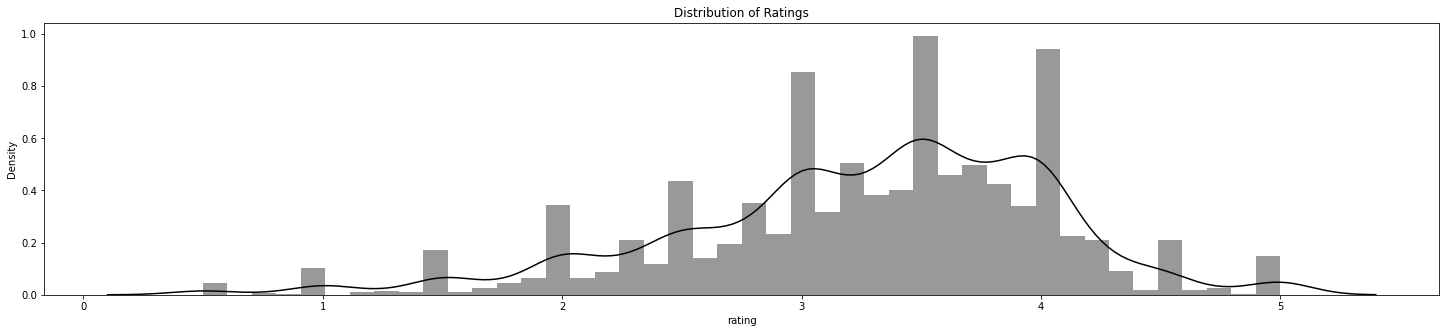

In [11]:
plt.figure(figsize=(25,5))
sns.distplot(df['rating'], color = 'black')
plt.title('Distribution of Ratings')
plt.show()

In [12]:
dd= df["title"].str.split(" ")

In [13]:
df["year"]=dd.apply(lambda x:x[-1])

In [14]:
df["year"]

0       (2004)
1       (1986)
2       (2004)
3       (1997)
4       (1989)
         ...  
7067    (1999)
7068    (2002)
7069    (2005)
7070    (1986)
7071    (1931)
Name: year, Length: 7072, dtype: object

In [15]:
df["year"]=df["year"].str.strip("(")
df["year"]=df["year"].str.strip(")")

In [16]:
df["year"].value_counts()

2002    244
1996    240
1995    228
2001    227
1998    225
       ... 
1915      1
1917      1
Road      1
1922      1
1902      1
Name: year, Length: 103, dtype: int64

In [17]:
pd.set_option("max_rows",103)
df["year"].value_counts()

2002    244
1996    240
1995    228
2001    227
1998    225
2000    225
1999    221
1997    217
2004    206
2006    204
1994    198
2003    197
2005    195
2007    195
2009    190
2008    189
2011    180
2010    179
2014    170
2013    166
1993    166
2012    160
2015    148
1988    133
1992    127
1987    123
1990    117
1986    115
1989    115
1991    111
1985    105
1984     77
1982     71
1983     67
1981     64
1980     63
2016     52
1979     48
1977     47
1978     46
1973     41
1974     39
1971     33
1975     32
1962     32
1959     32
1955     32
1965     32
1964     31
1976     31
1966     30
1972     30
1960     30
1963     29
1968     28
1967     28
1953     26
1957     26
1961     25
1958     24
1970     23
1956     22
1969     22
1942     20
1939     20
1954     20
1940     17
1947     17
1948     16
1946     16
1951     16
1950     16
1949     15
1941     15
1937     14
1952     13
1945     13
1944     12
1936     11
1938     10
1931      9
1932      8
1933      8
1934

In [18]:
df["year"]=df["year"].replace(("Road",""),("2014","1996"))

In [19]:
df["year"]=df["year"].astype(int)

In [20]:
print(df["year"].min())
print(df["year"].max())

1902
2016


In [21]:
df[df["year"]==2016].sort_values(by="rating",ascending=False).head()

,title,genres,rating,year
3070,Ice Age: The Great Egg-Scapade (2016),Adventure|Animation|Children|Comedy,5.000000,2016
4845,Piper (2016),Animation,4.500000,2016
4970,Pride and Prejudice and Zombies (2016),Comedy|Horror|Romance|Thriller,4.500000,2016
5592,Shin Godzilla (2016),Action|Adventure|Fantasy|Sci-Fi,4.000000,2016
7063,Zootopia (2016),Action|Adventure|Animation|Children|Comedy,3.890625,2016


In [22]:
df['title'] = df['title'].str.split(' ')
df['title'] = df['title'].apply(lambda x: ' '.join(x[:-1]))

In [23]:
df['title']

0         'Hellboy': The Seeds of Creation
1                          'Round Midnight
2                             'Salem's Lot
3                       'Til There Was You
4                              'burbs, The
                       ...                
7067                              eXistenZ
7068                                   xXx
7069               xXx: State of the Union
7070                        ¡Three Amigos!
7071    À nous la liberté (Freedom for Us)
Name: title, Length: 7072, dtype: object

In [24]:
df

,title,genres,rating,year
0,'Hellboy': The Seeds of Creation,Action|Adventure|Comedy|Documentary|Fantasy,4.000000,2004
1,'Round Midnight,Drama|Musical,3.500000,1986
2,'Salem's Lot,Drama|Horror|Mystery|Thriller,5.000000,2004
3,'Til There Was You,Drama|Romance,4.000000,1997
4,"'burbs, The",Comedy,3.176471,1989
...,...,...,...,...
7067,eXistenZ,Action|Sci-Fi|Thriller,3.863636,1999
7068,xXx,Action|Crime|Thriller,2.770833,2002
7069,xXx: State of the Union,Action|Crime|Thriller,2.000000,2005
7070,¡Three Amigos!,Comedy|Western,3.134615,1986


In [25]:
df[df["year"]==2016].sort_values(by="rating",ascending=False).head()

,title,genres,rating,year
3070,Ice Age: The Great Egg-Scapade,Adventure|Animation|Children|Comedy,5.000000,2016
4845,Piper,Animation,4.500000,2016
4970,Pride and Prejudice and Zombies,Comedy|Horror|Romance|Thriller,4.500000,2016
5592,Shin Godzilla,Action|Adventure|Fantasy|Sci-Fi,4.000000,2016
7063,Zootopia,Action|Adventure|Animation|Children|Comedy,3.890625,2016


In [26]:
df["genres"].unique()

array(['Action|Adventure|Comedy|Documentary|Fantasy', 'Drama|Musical',
       'Drama|Horror|Mystery|Thriller', 'Drama|Romance', 'Comedy',
       'Drama', 'Comedy|Drama|Romance', 'Children|Comedy|Fantasy|Sci-Fi',
       'Drama|Thriller', 'Comedy|Romance', 'Thriller',
       'Adventure|Romance|Thriller', 'Adventure|Children|Comedy',
       'Adventure|Animation|Children', 'Children|Comedy',
       'Adventure|Comedy|Fantasy', 'Comedy|Crime|Drama|Mystery|Thriller',
       'Crime|Drama', 'Adventure|Drama|Thriller', 'Action', 'Horror',
       'Comedy|Fantasy|Romance', 'Film-Noir|Thriller',
       'Action|Adventure|Fantasy', 'Drama|Horror|Thriller',
       'Crime|Thriller', 'Comedy|Drama', 'Comedy|Fantasy', 'Comedy|War',
       'Drama|Sci-Fi', 'Crime|Film-Noir', 'Action|Crime|Thriller',
       'Action|Comedy|Crime', 'Documentary', 'Action|Adventure|Sci-Fi',
       'Adventure|Drama|Sci-Fi', 'Sci-Fi', 'Action|Drama|Sci-Fi|Thriller',
       'Drama|Fantasy|Romance|Sci-Fi', 'Crime|Drama|Romance|Thr

In [27]:
# d = df.drop(['genres'], axis = 1)
# d

In [28]:
#  x = df['genres'].str.split('|')
# x

In [29]:
# x = pd.concat([d, x], axis = 1)
# x

In [30]:
# x = x.explode('genres')
# x

In [31]:
# lets write an interactive function to get the list of best movies from each genre
# @interact
# def genre_movies(genre=['Action', 'Adventure', 'Animation','Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
#        'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance','Sci-Fi', 'Thriller', 'War', 'Western'], year = 2000):
#     x=df["genres"].str.split("|")
#     d=df.drop(["genres"],axis=1)
#     x=pd.concat([d,x],axis=1)
#     x["genres"]=x.explode("genres")
#     x=x[(x["genres"]==genre)&(x["year"]>=year)][['title', 'rating', 'year']].sort_values(by="rating",ascending=False).reset_index(drop = True).head(10)
#     return x
    
    
    
    
    
    

@interact
def genre(Genre = ['Action', 'Adventure', 'Animation','Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance','Sci-Fi', 'Thriller', 'War', 'Western'], year = 2000):
    x = df['genres'].str.split('|')
    d = df.drop(['genres'], axis = 1)
    x = pd.concat([d, x], axis = 1)
    x = x.explode('genres')
    x= x[(x['genres'] == Genre) & (x['year'] >= year)][['title', 'rating', 'year']].sort_values(by = 'rating',
                            ascending = False).reset_index(drop = True).head(10)
    return x    
    
    
    

    
    

interactive(children=(Dropdown(description='Genre', options=('Action', 'Adventure', 'Animation', 'Children', '…

In [32]:
movies_genres= df["genres"].str.split("|")
trf=TransactionEncoder()
movies_genres=trf.fit_transform(movies_genres)
genre_data=pd.DataFrame(movies_genres,columns=trf.columns_)



In [33]:
genre_data.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,False,True,True,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [34]:
genre_data=genre_data.astype(int)
genre_data.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,1,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
genre_data.insert(0, 'title', df['title'])
genre_data.head()

,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,'Hellboy': The Seeds of Creation,0,1,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,'Round Midnight,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,'Salem's Lot,0,0,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0
3,'Til There Was You,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,"'burbs, The",0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
genre_data=genre_data.transpose()
genre_data.head()

,0,1,2,3,4,5,6,7,8,9,...,7062,7063,7064,7065,7066,7067,7068,7069,7070,7071
title,'Hellboy': The Seeds of Creation,'Round Midnight,'Salem's Lot,'Til There Was You,"'burbs, The",'night Mother,(500) Days of Summer,*batteries not included,...And Justice for All,1-900 (06),...,Zoom,Zootopia,Zulu,Zulu,[REC],eXistenZ,xXx,xXx: State of the Union,¡Three Amigos!,À nous la liberté (Freedom for Us)
(no genres listed),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Action,1,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,1,1,0,0
Adventure,1,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
Animation,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [37]:
genre_data = genre_data.rename(columns = genre_data.iloc[0])
genre_data.head()

,'Hellboy': The Seeds of Creation,'Round Midnight,'Salem's Lot,'Til There Was You,"'burbs, The",'night Mother,(500) Days of Summer,*batteries not included,...And Justice for All,1-900 (06),...,Zoom,Zootopia,Zulu,Zulu,[REC],eXistenZ,xXx,xXx: State of the Union,¡Three Amigos!,À nous la liberté (Freedom for Us)
title,'Hellboy': The Seeds of Creation,'Round Midnight,'Salem's Lot,'Til There Was You,"'burbs, The",'night Mother,(500) Days of Summer,*batteries not included,...And Justice for All,1-900 (06),...,Zoom,Zootopia,Zulu,Zulu,[REC],eXistenZ,xXx,xXx: State of the Union,¡Three Amigos!,À nous la liberté (Freedom for Us)
(no genres listed),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Action,1,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,1,1,0,0
Adventure,1,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
Animation,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [38]:
genre_data = genre_data.drop(genre_data.index[0])
genre_data = genre_data.astype(int)
genre_data.head()

,'Hellboy': The Seeds of Creation,'Round Midnight,'Salem's Lot,'Til There Was You,"'burbs, The",'night Mother,(500) Days of Summer,*batteries not included,...And Justice for All,1-900 (06),...,Zoom,Zootopia,Zulu,Zulu,[REC],eXistenZ,xXx,xXx: State of the Union,¡Three Amigos!,À nous la liberté (Freedom for Us)
(no genres listed),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Action,1,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,1,1,0,0
Adventure,1,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
Animation,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
Children,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [39]:
# Movie="Zootopia"

In [40]:
# similar_movies = genre_data.corrwith(genre_data[Movie])

In [41]:
# type(similar_movies)

In [42]:
# similar_movies=similar_movies.sort_values(ascending=False)

In [43]:
# similar_movies.iloc[1:]

In [44]:
@interact
def recommendation_system(Movie=list(genre_data.columns)):
    similar_movies = genre_data.corrwith(genre_data[Movie])
    similar_movies = similar_movies.sort_values(ascending=False)
    similar_movies = similar_movies.iloc[1:]
    return similar_movies.head(20)
    

interactive(children=(Dropdown(description='Movie', options=("'Hellboy': The Seeds of Creation", "'Round Midni…